<a href="https://colab.research.google.com/github/SandeepDattan/K-Means-Clustering-Customer-Spending/blob/main/K_Means_Clustering_Customer_Spending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer classification in Groups using K-Means algorithm

## Dataset : cust_spends.csv
### It contains the following records:
### Customer − Customer ID
### Apparel − Amount spent in apparel products
### Beauty and Healthcare − Amount spent in beauty and healthcare products

In [9]:
# Customer classification in Groups using K-Means algorithm
# dataset : cust_spends.csv

In [16]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [11]:
# Importing dataset

df=pd.read_csv('/content/drive/MyDrive/dataset/cust_spends.csv')

In [12]:
df.head()

,Customer,Apparel,Beauty and Healthcare
0,1,21.10,0.7
1,2,15.23,5.5
2,3,5.22,18.6
3,4,31.10,1.8
4,5,6.12,21.5


In [13]:
df.describe()

,Customer,Apparel,Beauty and Healthcare
count,20.00000,20.000000,20.000000
mean,10.50000,13.463000,9.788000
std,5.91608,8.780425,7.359884
min,1.00000,4.250000,0.700000
25%,5.75000,5.895000,2.725000
50%,10.50000,13.575000,7.750000
75%,15.25000,16.697500,16.575000
max,20.00000,31.100000,21.500000


In [14]:
df.isnull().sum()

Customer                 0
Apparel                  0
Beauty and Healthcare    0
dtype: int64

Text(0, 0.5, 'Beauty and Healthcare')

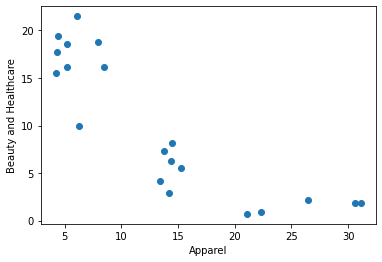

In [15]:
# Scatter plot to depict the customer spends on apparel and beauty and healthcare products. 
# Identify number of clusters existing in the dataset - 3

plt.scatter(df['Apparel'],df['Beauty and Healthcare'])
plt.xlabel('Apparel')
plt.ylabel('Beauty and Healthcare')

In [17]:
# Normalize the features using StandardScaler and plot them in the scatter plot

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['Apparel','Beauty and Healthcare']])

In [20]:
# Create the number of clusters as suggested by the elbow method using K-means algorithm

cluster_range=range(1,10)
cluster_errors=[]
for num_clusters in cluster_range:
  model=KMeans(n_clusters=num_clusters,random_state=101)
  model.fit(scaled_df)
  cluster_errors.append(model.inertia_)

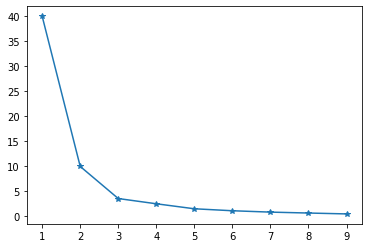

In [21]:
from matplotlib import markers
plt.figure(figsize=(6,4))
plt.plot(cluster_range, cluster_errors, marker='*')

In [22]:
# Create the number of clusters as suggested by the elbow method using K-means algorithm
K=3
clusters=KMeans(n_clusters=K, random_state=101)
clusters.fit(scaled_df)
df['cluster_id']=clusters.labels_

In [23]:
# cluster label 0

df[df['cluster_id']==0]

,Customer,Apparel,Beauty and Healthcare,cluster_id
2,3,5.22,18.6,0
4,5,6.12,21.5,0
6,7,8.50,16.2,0
8,9,4.34,17.7,0
10,11,5.20,16.2,0
12,13,4.40,19.4,0
13,14,4.25,15.5,0
15,16,7.90,18.8,0


In [24]:
# cluster label 1

df[df['cluster_id']==1]

,Customer,Apparel,Beauty and Healthcare,cluster_id
1,2,15.23,5.50,1
5,6,14.50,8.20,1
9,10,13.75,7.30,1
11,12,14.20,2.90,1
16,17,13.40,4.20,1
18,19,14.40,6.28,1
19,20,6.25,9.98,1


In [25]:
# cluster label 2

df[df['cluster_id']==2]

,Customer,Apparel,Beauty and Healthcare,cluster_id
0,1,21.1,0.7,2
3,4,31.1,1.8,2
7,8,26.5,2.2,2
14,15,22.3,0.9,2
17,18,30.6,1.9,2
